In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from PIL import Image
import seaborn as sns


In [38]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df=pd.read_csv('E:\\3rd sem proj\\fds ko project\\archive\\training_images\\training_images_digit.csv')

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0


In [5]:
#shuffling the data
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [7]:
X=df.drop('label',axis=1)
y=df['label']

In [8]:
pc=PCA(n_components=250)
pc.fit(X)
X_pc=pc.transform(X)

In [25]:
#making a dict for numbers and labels:
digit_dict={
    '०':0,
    '१': 1,
    '२':2,
    '३': 3,
    '४': 4,
    '५': 5,
    '६': 6,
    '७': 7,
    '८': 8,
    '९': 9
}

In [26]:
digit_dict = {v: k for k, v in digit_dict.items()}


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X_pc,y,test_size=0.2,random_state=42)

In [11]:
lr=LogisticRegression(multi_class='multinomial',max_iter=1000)
lr.fit(X_train,y_train)


e:\conda\condaex\envs\classifier\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [12]:
y_pred=lr.predict(X_test)

In [ ]:
#using a knearest neighbours
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       415
           1       1.00      1.00      1.00       404
           2       0.94      0.97      0.96       379
           3       0.98      0.95      0.96       402
           4       0.99      0.99      0.99       371
           5       0.99      0.99      0.99       420
           6       1.00      0.98      0.99       407
           7       0.99      0.97      0.98       386
           8       0.99      1.00      0.99       385
           9       1.00      0.99      0.99       431

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

0.98325


In [13]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.95175
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       415
           1       0.98      0.99      0.98       404
           2       0.88      0.91      0.89       379
           3       0.92      0.90      0.91       402
           4       0.95      0.96      0.96       371
           5       0.95      0.95      0.95       420
           6       0.94      0.93      0.94       407
           7       0.98      0.94      0.96       386
           8       0.98      0.97      0.98       385
           9       0.97      0.97      0.97       431

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



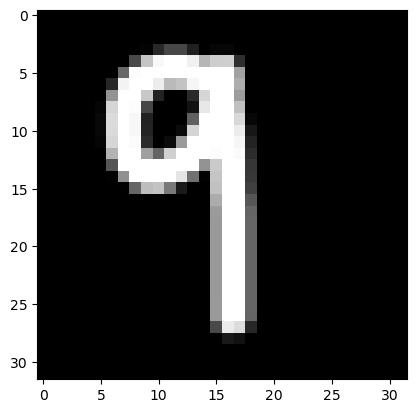

In [66]:
image=Image.open('E:\\3rd sem proj\\fds ko project\\archive\\testing_sample_images\\drawing (3).png')
image=image.convert('L')
image=image.resize((32,32))
plt.imshow(image,cmap='gray')
plt.show()

In [67]:
image=np.array(image)/255

In [68]:
image=image.flatten()
pca_image=pc.transform([image])

e:\conda\condaex\envs\classifier\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



In [72]:
digit_dict[lr.predict(pca_image)[0]]

'८'

In [70]:
knn.predict(pca_image)

array([5])

In [42]:

fig=px.scatter_3d(x=X_pc[:2000,0],y=X_pc[:2000,1],z=X_pc[:2000,2],color=y[:2000],labels={'x':'PC1','y':'PC2','z':'PC3'},size=[0.4]*2000,
                  opacity=1)
fig.update_layout(title='3D Scatter plot of first 3 principal components')
fig.update_layout(width=1200, height=800)  # Set custom width and height

fig.show()


In [76]:
import pickle
with open('E:\\3rd sem proj\\fds ko project\\archive\\models\\knn.pkl','wb') as f:
    pickle.dump(knn,f)

with open('E:\\3rd sem proj\\fds ko project\\archive\\models\\pca_250.pkl','wb') as f:
    pickle.dump(pc,f)

with open('E:\\3rd sem proj\\fds ko project\\archive\\models\\logistic_regression.pkl','wb') as f:
    pickle.dump(lr,f)
  